<a href="https://colab.research.google.com/github/andre-motta/ECE542-project-c/blob/main/smote_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
from collections import Counter

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from matplotlib import pyplot
from numpy import where
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import confusion_matrix 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, f1_score 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.datasets import make_multilabel_classification

from keras.preprocessing import sequence, text
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, BatchNormalization, Activation
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras import metrics
from keras.optimizers import Adam
from keras.utils import to_categorical


import matplotlib.pyplot as plt
from collections import Counter

Class=0, n=1006926 (75.052%)
Class=1, n=55216 (4.116%)
Class=2, n=73068 (5.446%)
Class=3, n=206436 (15.387%)


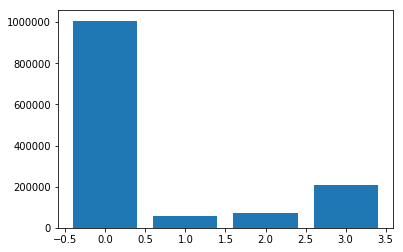

In [23]:
#file = ['subject_001_01__y.csv','subject_001_02__y.csv','subject_001_03__y.csv','subject_001_04__y.csv','subject_001_05__y.csv','subject_001_06__y.csv','subject_001_07__y.csv','subject_001_08__y.csv','subject_002_01__y.csv','subject_002_02__y.csv','subject_002_03__y.csv','subject_002_04__y.csv','subject_002_05__y.csv','subject_003_01__y.csv','subject_003_02__y.csv','subject_003_03__y.csv','subject_004_01__y.csv','subject_004_02__y.csv','subject_005_01__y.csv','subject_005_02__y.csv','subject_005_03__y.csv','subject_006_01__y.csv','subject_006_02__y.csv','subject_006_03__y.csv','subject_007_01__y.csv','subject_007_02__y.csv','subject_007_03__y.csv','subject_007_04__y.csv','subject_008_01__y.csv']
file = ['dataset.csv']
df={}
y={}
X={}
for i,fle in enumerate(file):
  df[i] = pd.read_csv('ProcessedData/'+fle)
  y[i]=df[i].iloc[:,-1]
  X[i] = df[i].iloc[:,1:-1]
  #y=df.iloc[:,-1:]
  counter = Counter(y[i])

  for k,v in counter.items():
    per = v / len(y[i]) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
  pyplot.bar(counter.keys(), counter.values())
  pyplot.show()

In [24]:
X_dataset = pd.DataFrame(X[0])
y_dataset = pd.DataFrame(y[0])

In [27]:
X_dataset = X_dataset.iloc[::4,:]
y_dataset = y_dataset.iloc[::4,:]
X_dataset.to_csv('SmotedWindow2/X.csv', index=False)    
y_dataset.to_csv('SmotedWindow2/y.csv', index=False)    

C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:591: FutureWarning: Pass sampling_strategy={0: 335411} as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


Class=0, n=335411 (25.000%)


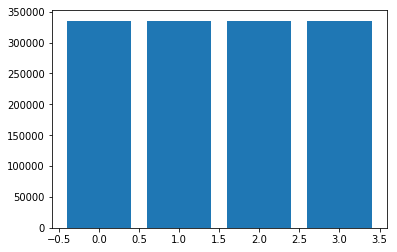

Class=1, n=335411 (25.000%)


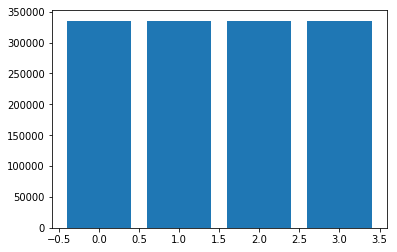

Class=2, n=335411 (25.000%)


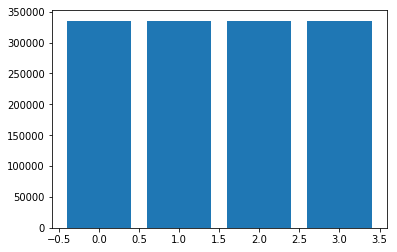

Class=3, n=335411 (25.000%)


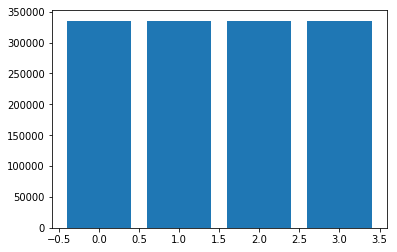

In [20]:
for i,fle in enumerate(file):
    y[i] = LabelEncoder().fit_transform(y[i])
    count = len(y[i])
    splt = int(len(df[0])/4)
    counter = Counter(y[i])
#     for k,v in counter.items():
#         print('splt=',splt,'v=',v)
#         if v < splt:
#             splt = v
    down=0
    up=0
    for k,v in counter.items():
        if v < splt:
            oversample = SMOTE(sampling_strategy={k:splt})
            X[i], y[i] = oversample.fit_resample(X[i], y[i])
        else:
            under = RandomUnderSampler({k:splt})
            X[i], y[i] = under.fit_resample(X[i], y[i])
    if i < 1:
        X_dataset = pd.DataFrame(X[i])
        y_dataset = pd.DataFrame(y[i])
    else:
        X_dataset = pd.concat([X_dataset,(pd.DataFrame(X[1]))])
        y_dataset = pd.concat([y_dataset,(pd.DataFrame(y[1]))])



    counter = Counter(y[i])
    #print(counter)
    for k,v in counter.items():
        per = v / len(y[i]) * 100
        print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
        # plot the distribution
        pyplot.bar(counter.keys(), counter.values())
        pyplot.show()

In [11]:
X_dataset.to_csv('SmotedWindow2/X.csv', index=False)    
y_dataset.to_csv('SmotedWindow2/y.csv', index=False)    

In [7]:
y_dataset

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


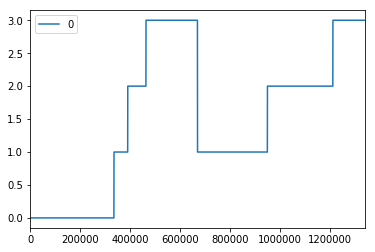

In [21]:
y_dataset.plot()

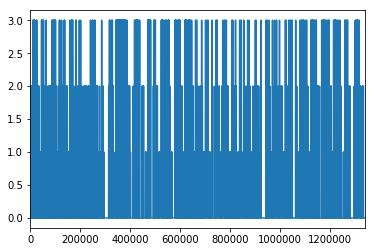

In [16]:
df[0]['y'].plot()